Eigenvalues of physical hamiltonian:  [-0.58036763  2.62101132]
eigenvalues of supersystem:  [-1.         -0.58036763  1.          2.          2.62101132]
eigenvectors of supersystem: 
[[ 0.         -0.81715676  0.          0.          0.5764155 ]
 [ 0.          0.5764155   0.          0.          0.81715676]
 [ 1.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.          0.          1.          0.          0.        ]]


C:\Users\zains\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part


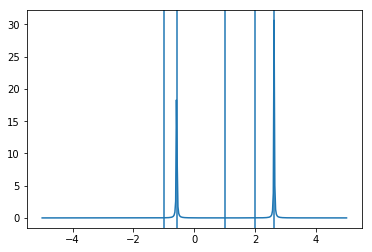

In [2]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
#%matplotlib qt

w = np.linspace(-5.,5.,400)
naux = 3
nphys = 2
h_phys = np.random.random((nphys,nphys))    # h_alpha,beta
h_phys += h_phys.T
#aux_v = np.random.random((nphys,naux))      # nu_alpha,j
aux_v = np.zeros((nphys,naux))
aux_e = np.asarray([-1.0, 2.0, 1.0])
eta = 0.01

e, v = np.linalg.eigh(h_phys)
print('Eigenvalues of physical hamiltonian: ',e)

def construct_X(w, eta, aux_v, aux_e, h_phys):

    n_omega = w.shape[0]
    naux = aux_e.shape[0]
    nphys = h_phys.shape[0]

    S = np.zeros((nphys,nphys,n_omega),dtype='complex128')
    X = np.zeros((nphys,nphys,n_omega),dtype='complex128')
    X_tr = np.zeros(n_omega)

    for i, w_val in enumerate(w):
        S[:,:,i] = np.sum([np.outer(aux_v[:,j],aux_v[:,j]) / (w_val - aux_e[j] + 1.j*eta) for j in range(naux)], 0)

        X[:,:,i] = -np.linalg.inv(np.eye(nphys)*(w_val + 1.j*eta) - h_phys - S[:,:,i]).imag / np.pi

        #X[:,:,i] = (np.eye(nphys)*eta + S_im[:,:,i]) * np.linalg.inv( (np.power(np.eye(nphys)*w_val - h_phys - S_re[:,:,i],2) + np.power(np.eye(nphys)*eta + S_im[:,:,i],2)) )
        X_tr[i] = np.trace(X[:,:,i])

    return X, X_tr

X, X_tr = construct_X(w, eta, aux_v, aux_e, h_phys)

# Find other way of doing it by explicitly diagonalizing physical + auxiliary system
n_super = nphys + naux
h_super = np.zeros((n_super,n_super))
h_super[:nphys,:nphys] = h_phys
h_super[nphys:,nphys:] = np.diag(aux_e)
h_super[:nphys,nphys:] = aux_v
h_super[nphys:,:nphys] = aux_v.T
assert(np.allclose(h_super,h_super.T))

e_super, v_super = np.linalg.eigh(h_super)
print('eigenvalues of supersystem: ', e_super)
print('eigenvectors of supersystem: ')
print(v_super)

plt.plot(w, X_tr)
for e_val in e_super:
    plt.axvline(e_val)
plt.show()